### 1. Import Library

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15076 sha256=f0caefde6fb18846046dd5f5e476b6e43b2deb218fad0f20e16d63cf383faf1e
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from geneticalgorithm import geneticalgorithm as ga
import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Read and pre-processing data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tối ưu hóa ứng dụng/DOAN/data_arrhythmia.csv', delimiter=';')
print(df.head())

   age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0   75    0     190      80            91           193           371   
1   56    1     165      64            81           174           401   
2   54    0     172      95           138           163           386   
3   55    0     175      94           100           202           380   
4   75    0     190      80            88           181           360   

   t_interval  p_interval  qrs  ...   KY    KZ   LA   LB LC   LD   LE    LF  \
0         174         121  -16  ...  0.0   9.0 -0.9  0.0  0  0.9  2.9  23.3   
1         149          39   25  ...  0.0   8.5  0.0  0.0  0  0.2  2.1  20.4   
2         185         102   96  ...  0.0   9.5 -2.4  0.0  0  0.3  3.4  12.3   
3         179         143   28  ...  0.0  12.2 -2.2  0.0  0  0.4  2.6  34.6   
4         177         103  -16  ...  0.0  13.1 -3.6  0.0  0 -0.1  3.9  25.4   

     LG  diagnosis  
0  49.4          8  
1  38.8          6  
2  49.0         10  
3 

In [ ]:
df.shape

(452, 280)

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.isna().sum()[df.isna().sum() > 0]

,0
T,8
P,22
QRST,1
J,376
heart_rate,1


In [ ]:
df['T'].fillna(0, inplace = True)
df['P'].fillna(0, inplace = True)
df['QRST'].fillna(0, inplace = True)
df['J'].fillna(0, inplace = True)
df['heart_rate'].fillna(0, inplace = True)

<ipython-input-8-77675cfca087>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['T'].fillna(0, inplace = True)
<ipython-input-8-77675cfca087>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col

In [ ]:
df['T'] = df['T'].astype('int')
df['heart_rate'] = df['heart_rate'].astype('int')
df['P'] = df['P'].astype('int')
df['QRST'] = df['QRST'].astype('int')
df['J'] = df['J'].astype('int')

In [ ]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [ ]:
df['diagnosis'].unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15])

In [ ]:
dictionary = {14:11, 15:12, 16:13}

def conver_label(x):
  if (x == 14):
    return 10
  elif (x == 15):
    return 11
  elif(x == 16):
    return 12
  return x-1

df['diagnosis'] = df['diagnosis'].apply(lambda x: conver_label(x))
df['diagnosis'] = df['diagnosis'].astype('int')
df['diagnosis'].unique()

array([ 7,  5,  9,  0,  6, 10,  2, 12,  1,  3,  4,  8, 11])

## 3. EDA

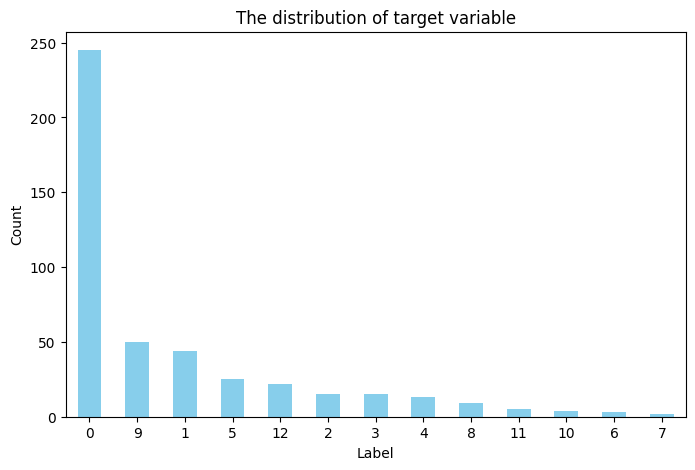

In [ ]:
label_counts = df['diagnosis'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue')
plt.title('The distribution of target variable')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

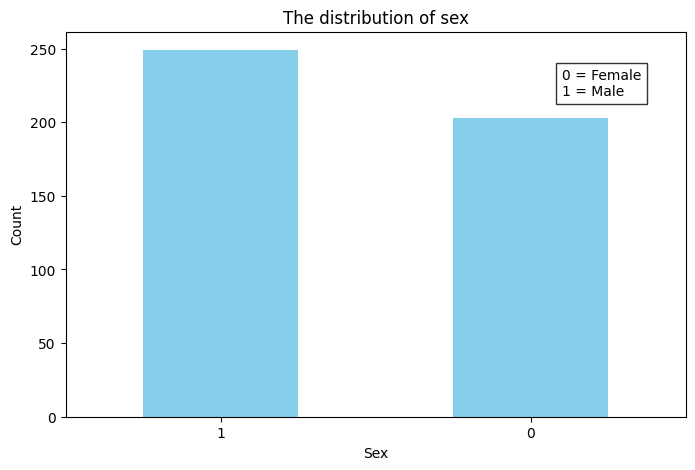

In [ ]:
label_counts = df['sex'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue')
plt.title('The distribution of sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.text(1.1, max(label_counts) * 0.95, '0 = Female\n1 = Male',
         fontsize=10, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8))
plt.show()

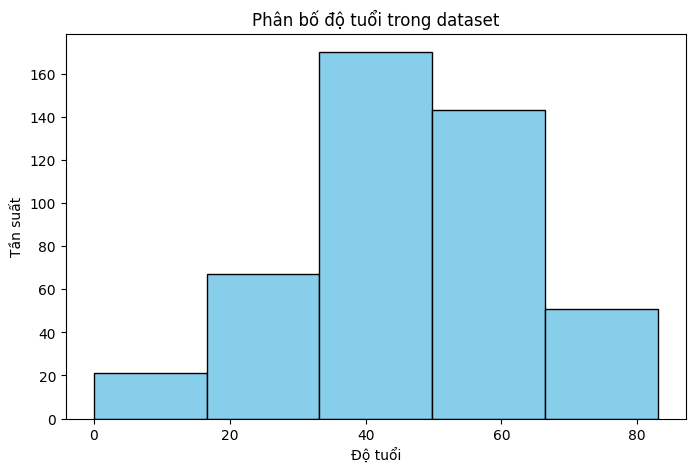

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Phân bố độ tuổi trong dataset')
plt.xlabel('Độ tuổi')
plt.ylabel('Tần suất')
plt.show()

## 4. Feature Selection

In [ ]:
!pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=390769 sha256=5483edf55c84e1eff589d9b38b7979cc4f69764523c89834019ea75515757bc5
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


In [ ]:
import pymrmr
## FEATURE SELECTION
label_column = 'diagnosis'  # Thay thế bằng tên cột chứa nhãn
if label_column not in df.columns:
    raise ValueError(f"Label column '{label_column}' is not in the dataset!")

# Tách đặc trưng và nhãn
features = df.drop(columns=[label_column])
labels = df[label_column]

# Thêm nhãn vào đầu dataframe để tương thích với pymrmr
data_for_mrmr = pd.concat([labels, features], axis=1)

# Thực hiện mRMR - Chọn ra 100 đặc trưng quan trọng nhất
selected_features = pymrmr.mRMR(data_for_mrmr, 'MIQ', 100)  # Thay '100' bằng số đặc trưng bạn muốn

print("Các đặc trưng được chọn bởi mRMR:")
print(selected_features)

Các đặc trưng được chọn bởi mRMR:
['T', 'EJ', 'FI', 'IV', 'CV', 'CI', 'EL', 'DE', 'FV', 'DF', 'GG', 'KO', 'JO', 'AE', 'BS', 'IL', 'IH', 'EI', 'BH', 'DS', 'DO', 'HJ', 'AP', 'DK', 'DN', 'EK', 'FR', 'DU', 'AB', 'DG', 'AF', 'HR', 'DZ', 'CE', "R'_wave", 'EH', 'DB', 'KK', 'AO', 'AK', 'BU', 'CJ', 'ET', 'CN', 'J', 'CY', 'heart_rate', 'DT', 'LE', 'KB', 'DV', 'AG', 'IY', 'JI', 'sex', 'JE', 'JH', 'GN', 'QRST', 'AL', 'IR', 'KA', 'HA', 'GU', 'q-t_interval', 'FM', 'KE', 'GC', 'HN', 'FA', 'GM', 'DM', 'EG', 'EZ', 'AH', 'KV', 'EF', 'DD', 'JN', 'ES', 'EB', 'IZ', 'CG', 'KS', 'AU', 'GS', 'AT', 'JR', 'DA', 'GJ', 'BT', 'BN', 'EM', 'JD', 'GZ', 'FC', 'IS', 'JZ', 'ID', 'qrs']


In [ ]:
df2 = df[selected_features + ['diagnosis']]
df2

,T,EJ,FI,IV,CV,CI,EL,DE,FV,DF,...,BN,EM,JD,GZ,FC,IS,JZ,ID,qrs,diagnosis
0,13,0,0,0.0,0,0,0,0,0,0,...,0,0,0.0,0.1,52,-6.0,52.7,1.2,-16,7
1,37,0,0,0.0,0,0,0,0,0,0,...,0,0,0.4,0.3,48,0.0,27.7,0.7,25,5
2,34,0,0,6.5,0,0,0,0,0,0,...,88,0,-0.9,-0.2,44,0.0,23.3,1.0,96,9
3,11,0,0,0.0,0,0,0,0,0,0,...,72,0,2.1,-0.4,60,-6.5,51.0,1.2,28,0
4,13,0,0,0.0,0,0,0,0,0,0,...,56,0,-0.2,0.2,52,-5.7,43.0,1.1,-16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,4,0,0,0.0,0,0,0,0,0,0,...,48,0,1.0,0.1,40,-6.2,3.8,0.6,-37,0
448,66,0,0,0.0,0,0,0,0,0,0,...,56,0,1.7,0.7,52,-4.5,137.8,-0.3,86,9
449,-19,0,0,12.6,0,0,0,0,0,0,...,52,0,-4.1,1.2,48,0.0,-146.2,1.9,-85,1
450,29,0,0,0.0,0,0,0,0,0,0,...,0,0,2.0,1.2,48,0.0,94.4,1.2,54,0


In [ ]:
X = df2.drop(['diagnosis'], axis = 1).values
y = df2['diagnosis'].values

In [ ]:
X.shape

(452, 100)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Methodology

### CNN-1D architecture

In [ ]:
class ECGDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].unsqueeze(1), self.y[idx]

In [ ]:
train_dataset = ECGDataset(X_train, y_train)
test_dataset = ECGDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
#test
next(iter(train_loader))[0][0]

tensor([[ 0.6522],
        [-0.0945],
        [-0.0817],
        [-0.2134],
        [-0.0471],
        [-0.0471],
        [-0.1058],
        [-0.0817],
        [-0.0471],
        [-0.1254],
        [-0.0723],
        [-0.0610],
        [ 0.1916],
        [-0.0667],
        [-0.0667],
        [ 0.0726],
        [ 0.3948],
        [-0.0817],
        [-0.0667],
        [-0.0945],
        [-0.0786],
        [-0.6656],
        [-0.0471],
        [-0.3019],
        [ 1.6668],
        [-0.0817],
        [-0.0806],
        [-0.0945],
        [-0.0471],
        [-0.0945],
        [-0.0667],
        [ 0.1290],
        [-0.2339],
        [-0.1342],
        [-0.0903],
        [-0.0667],
        [-0.3176],
        [-0.7631],
        [-0.1721],
        [-0.1403],
        [-0.0945],
        [-0.4874],
        [-0.0667],
        [-0.0793],
        [ 0.0439],
        [ 1.3209],
        [-0.0910],
        [-0.1160],
        [ 0.5459],
        [ 0.1694],
        [-0.0945],
        [-0.0945],
        [ 0.

In [ ]:
class CNN1D(nn.Module):
    def __init__(self, input_size, filters, kernel_size, blocks, num_classes):
        super(CNN1D, self).__init__()

        layers = []
        for block in range(blocks):
            layers.append(nn.Conv1d(in_channels=1 if block == 0 else filters,
                                    out_channels=filters,
                                    kernel_size=kernel_size))
            layers.append(nn.ReLU())
            layers.append(nn.Conv1d(in_channels=filters,
                                    out_channels=filters,
                                    kernel_size=kernel_size))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool1d(kernel_size=2))
            layers.append(nn.Dropout(0.4))
            layers.append(nn.BatchNorm1d(filters))

        self.conv_layers = nn.Sequential(*layers)

        # Tính kích thước đầu ra sau Conv1D và MaxPooling
        self.conv_output_size = self._calculate_conv_output(input_size, kernel_size, blocks)
        #print(f"Conv output size: {self.conv_output_size}")  # Kiểm tra kích thước đầu ra

        self.flatten = nn.Flatten()
        # Điều chỉnh số lượng neuron dựa trên kích thước đầu ra sau Conv1D
        self.fc1 = nn.Linear(128, 256)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, num_classes)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)


    def _calculate_conv_output(self, input_size, kernel_size, blocks):
        # Tính toán kích thước đầu ra sau các lớp Conv1D và MaxPooling
        output_size = input_size
        for _ in range(blocks):
            output_size = (output_size - kernel_size + 1) // 2  # Conv + MaxPool (pooling kernel = 2)
        return output_size

    def forward(self, x):
        #print(f"Input shape: {x.shape}")
        x = self.conv_layers(x)
        #print(f"Shape after Conv layers: {x.shape}")
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        #print(f"Shape after Flatten: {x.shape}")
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
input_size = 100  # Số đặc trưng đầu vào
filters = 128
kernel_size = 5
blocks = 3
num_classes = len(set(df['diagnosis']))  # Số lớp của biến mục tiêu

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming `df['diagnosis']` contains the target labels
labels = df['diagnosis']
classes = np.unique(labels)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=labels)

In [ ]:
# Tạo mô hình
cnn_model = CNN1D(input_size=input_size, filters=filters, kernel_size=kernel_size, blocks=blocks, num_classes=num_classes)
weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=weights_tensor)
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-4)

In [ ]:
def train_cnn(train_loader, cnn_model):
  num_epochs = 60
  for epoch in range(num_epochs):
      cnn_model.train()
      running_loss = 0.0
      correct = 0
      total = 0
      for i, (inputs, targets) in enumerate(train_loader):
          optimizer.zero_grad()
          inputs = inputs.permute(0, 2, 1)
          outputs = cnn_model(inputs)
          targets = targets.long()
          loss = criterion(outputs, targets)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

          _, predicted = torch.max(outputs.data, 1)
          total += targets.size(0)  # Cập nhật tổng số dự đoán
          correct += (predicted == targets).sum().item()  # Cập nhật số dự đoán đúng
      accuracy = 100 * correct / total
      #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")
      return cnn_model

In [ ]:
def cnn_val(cnn_model, test_loader):
  cnn_model.eval()
  correct = 0
  total = 0
  predict_cnn = []
  with torch.no_grad():
    for inputs, labels in test_loader:
        #inputs = inputs.unsqueeze(1)
        inputs = inputs.permute(0, 2, 1)
        outputs = cnn_model(inputs)
        probabilities = F.softmax(outputs, dim=1)
        _, predicted = torch.max(probabilities, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Cập nhật số dự đoán đúng
        predict_cnn.extend(probabilities.numpy())
    #accuracy = 100 * correct / total
    #print(accuracy)
  return predict_cnn

In [ ]:
def cnn_evaluate(cnn_model, test_loader):
    cnn_model.eval()
    correct = 0
    total = 0
    predict_cnn = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Đảm bảo đầu vào có định dạng phù hợp với CNN
            inputs = inputs.permute(0, 2, 1)

            # Dự đoán đầu ra từ model
            outputs = cnn_model(inputs)

            # Lấy giá trị lớn nhất và nhãn dự đoán
            _, predicted = torch.max(outputs, 1)

            # Cập nhật số lượng đúng và tổng số lượng
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Chuyển predicted sang CPU và thêm vào danh sách
            predict_cnn.extend(predicted.cpu().numpy())

    # Tính độ chính xác (accuracy)
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

    # Trả về danh sách dự đoán
    return predict_cnn

### Base model

In [ ]:
base_classifiers = [
    ("RandomForest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier()),
    ("SVC", SVC(probability=True, random_state=42)),
    ("XGB", XGBClassifier(objective='multi:softmax', num_class=13)),
    ("CNN", cnn_model)
]

### Meta model

In [ ]:
meta_classifier = LogisticRegression()

### Fitness score

In [ ]:
def fitness_function(individual, base_classifiers, meta_classifier):
    selected_classifiers = [(name, model) for i, (name, model) in enumerate(base_classifiers) if individual[i] == 1]
    if not selected_classifiers:
        return 0.0

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    all_classes = label_encoder.classes_
    for train_idx, valid_idx in kf.split(X_train):
        X_tr, X_val = X_train[train_idx], X_train[valid_idx]
        y_tr, y_val = y_train[train_idx], y_train[valid_idx]

        base_predictions = []

        for name, clf in selected_classifiers:
          if name == "GradientBoosting":

            clf.fit(X_tr, y_tr)
            base_predictions.append(clf.predict_proba(X_val))

          if name == "RandomForest":
            missing_classes = set(all_classes) - set(y_tr)
            if missing_classes:
                # Add a minimal amount of each missing class to the training fold
                for missing_class in missing_classes:
                    X_fold_train = np.vstack([X_tr, X_train[0:1]])  # Adding dummy samples
                    y_fold_train = np.append(y_tr, missing_class)
                clf.fit(X_fold_train, y_fold_train)
            else:
                clf.fit(X_tr, y_tr)
            base_predictions.append(clf.predict_proba(X_val))

          if name == "SVC":
            clf.fit(X_tr, y_tr)
            base_predictions.append(clf.predict_proba(X_val))

          if name == "XGB":
            missing_classes = set(all_classes) - set(y_tr)
            if missing_classes:
                for missing_class in missing_classes:
                    X_fold_train = np.vstack([X_tr, X_train[0:1]])  # Adding dummy samples
                    y_fold_train = np.append(y_tr, missing_class)
                clf.fit(X_fold_train, y_fold_train, eval_set=[(X_val, y_val)], verbose=False)
            else:
                clf.fit(X_tr, y_tr)
            base_predictions.append(clf.predict_proba(X_val))

          if name == "CNN":
            train_dataset = ECGDataset(X_tr, y_tr)
            val_dataset = ECGDataset(X_val, y_val)

            train_loader = DataLoader(train_dataset, batch_size=5, shuffle=False)
            val_loader = DataLoader(val_dataset, batch_size=5, shuffle=False)
            base_predictions.append(cnn_val(train_cnn(train_loader, cnn_model), val_loader))


        # Stack predictions
        stacked_X = np.hstack(base_predictions)
        meta_classifier.fit(stacked_X, y_val)
        y_pred = meta_classifier.predict(stacked_X)

        f1_scores.append(f1_score(y_val, y_pred, average="weighted"))

    return np.mean(f1_scores)

In [ ]:
def wrapper_fitness_function(individual):
    return fitness_function(individual, base_classifiers, meta_classifier)

### GA for choosing basemodel combination

In [ ]:
n_classifiers = len(base_classifiers)

# Kích thước quần thể và số thế hệ
population_size = 25
max_generations = 10

# Tỉ lệ đột biến và lai ghép
mutation_rate = 0.1
crossover_rate = 0.7

# Tạo quần thể ban đầu
def initialize_population(population_size, n_classifiers):
    return np.random.randint(0, 2, size=(population_size, n_classifiers))

# Đánh giá fitness của quần thể
def evaluate_population(population):
    fitness_values = []
    for individual in population:
        fitness = fitness_function(individual, base_classifiers, meta_classifier)
        fitness_values.append(fitness)
    return np.array(fitness_values)

# Chọn lựa (Selection) theo Roulette Wheel
def select_individual(population, fitness_values):
    probabilities = fitness_values / fitness_values.sum()
    selected_index = np.random.choice(len(population), p=probabilities)
    return population[selected_index]

# Lai ghép (Crossover)
def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1, len(parent1) - 1)
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2
    return parent1.copy(), parent2.copy()

# Đột biến (Mutation)
def mutate(individual):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]  # Đảo giá trị giữa 0 và 1
    return individual

# Tìm tổ hợp tốt nhất
population = initialize_population(population_size, n_classifiers)
best_solution = None
best_fitness = float('-inf')

for generation in range(max_generations):
    fitness_values = evaluate_population(population)

    # Cập nhật cá thể tốt nhất
    max_fitness_idx = np.argmax(fitness_values)
    if fitness_values[max_fitness_idx] > best_fitness:
        best_fitness = fitness_values[max_fitness_idx]
        best_solution = population[max_fitness_idx]
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

    # Tạo quần thể mới
    new_population = []
    for _ in range(population_size // 2):
        parent1 = select_individual(population, fitness_values)
        parent2 = select_individual(population, fitness_values)
        child1, child2 = crossover(parent1, parent2)
        new_population.append(mutate(child1))
        new_population.append(mutate(child2))

    population = np.array(new_population)

print("Best Solution Found:", best_solution)
print("Best Fitness Achieved:", best_fitness)


Generation 0: Best Fitness = 0.9202508710875916
Generation 1: Best Fitness = 0.9217869118938206
Generation 2: Best Fitness = 0.9261922566997628
Generation 4: Best Fitness = 0.9483358014505993
Generation 5: Best Fitness = 0.9547231617662518
Generation 6: Best Fitness = 0.9612712206594701
Generation 7: Best Fitness = 0.9674576786065011
Generation 8: Best Fitness = 0.970751385929383
Best Solution Found: [0 1 1 1 1]
Best Fitness Achieved: 0.970751385929383


In [ ]:
test_score = wrapper_fitness_function(best_solution)
print("Performance on test set:", test_score)

Performance on test set: 0.920115692656991


In [ ]:
# Train the final stacked ensemble with the best combination
best_solution = [0, 1, 1, 1, 1]
evaluate = []
selected_classifiers = [clf for gene, clf in zip(best_solution, base_classifiers) if gene == 1]
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
all_classes = label_encoder.classes_

base_predictions_train = []
base_predictions_test = []

for name, clf in selected_classifiers:
  if name == "GradientBoosting":

    clf.fit(X_train, y_train)
    base_predictions_train.append(clf.predict_proba(X_train))
    base_predictions_test.append(clf.predict_proba(X_test))
    evaluate.append(clf.predict(X_test))

  if name == "RandomForest":
    missing_classes = set(all_classes) - set(y_train)
    if missing_classes:
        for missing_class in missing_classes:
            X_fold_train = np.vstack([X_train, X_train[0:1]])  # Adding dummy samples
            y_fold_train = np.append(y_train, missing_class)
        clf.fit(X_fold_train, y_fold_train)
    else:
        clf.fit(X_train, y_train)

    base_predictions_train.append(clf.predict_proba(X_train))
    base_predictions_test.append(clf.predict_proba(X_test))
    evaluate.append(clf.predict(X_test))

  if name == "SVC":
    clf.fit(X_train, y_train)
    base_predictions_train.append(clf.predict_proba(X_train))
    base_predictions_test.append(clf.predict_proba(X_test))
    evaluate.append(clf.predict(X_test))

  if name == "XGB":
    missing_classes = set(all_classes) - set(y_train)
    if missing_classes:
        for missing_class in missing_classes:
            X_fold_train = np.vstack([X_train, X_train[0:1]])  # Adding dummy samples
            y_fold_train = np.append(y_train, missing_class)
        clf.fit(X_fold_train, y_fold_train, eval_set=[(X_test, y_test)], verbose=False)
    else:
        clf.fit(X_train, y_train)
    base_predictions_train.append(clf.predict_proba(X_train))
    base_predictions_test.append(clf.predict_proba(X_test))
    evaluate.append(clf.predict(X_test))

  if name == "CNN":
    train_dataset = ECGDataset(X_train, y_train)
    test_dataset = ECGDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=5, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=5, shuffle=False)
    base_predictions_train.append(cnn_val(train_cnn(train_loader, cnn_model), train_loader))
    base_predictions_test.append(cnn_val(train_cnn(train_loader, cnn_model), test_loader))



# Stack predictions and evaluate the final model
stacked_X_train = np.hstack(base_predictions_train)
stacked_X_test = np.hstack(base_predictions_test)

meta_classifier.fit(stacked_X_train, y_train)
final_preds_GA = meta_classifier.predict(stacked_X_test)

# Evaluate the final model
f1_scores = []
f1_scores.append(f1_score(y_test, final_preds_GA, average="weighted"))

print(f"Final F1-Score: {np.mean(f1_scores):.4f}")

Final F1-Score: 0.6678


### Grid search for choosing basemodel combination

In [ ]:
import itertools
import time
start_time = time.time()

# Tạo không gian tìm kiếm
n_classifiers = len(base_classifiers)
search_space = list(itertools.product([0, 1], repeat=n_classifiers))

# Tìm tổ hợp tốt nhất
best_solution_grid = None
best_fitness_grid = float('-inf')

for individual in search_space:
    fitness = fitness_function(individual, base_classifiers, meta_classifier)
    if fitness > best_fitness_grid:
        best_fitness_grid = fitness
        best_solution_grid = individual

print("Grid Search - Best Solution:", best_solution_grid)
print("Grid Search - Best Fitness:", best_fitness_grid)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Thời gian chạy: {elapsed_time:.6f} giây")

Grid Search - Best Solution: (1, 1, 1, 1, 1)
Grid Search - Best Fitness: 0.7235154091138928
Thời gian chạy: 231.514844 giây


## Evaluation

In [ ]:
best_solution = [1, 1, 1, 1, 1] # Thay [0, 1, 1, 1, 1] nếu chạy GA
evaluate = []
selected_classifiers = [clf for gene, clf in zip(best_solution, base_classifiers) if gene == 1]
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
all_classes = label_encoder.classes_

base_predictions_train = []
base_predictions_test = []

for name, clf in selected_classifiers:
  if name == "GradientBoosting":

    clf.fit(X_train, y_train)
    base_predictions_train.append(clf.predict_proba(X_train))
    base_predictions_test.append(clf.predict_proba(X_test))
    evaluate.append(clf.predict(X_test))

  if name == "RandomForest":
    missing_classes = set(all_classes) - set(y_train)
    if missing_classes:
        for missing_class in missing_classes:
            X_fold_train = np.vstack([X_train, X_train[0:1]])  # Adding dummy samples
            y_fold_train = np.append(y_train, missing_class)
        clf.fit(X_fold_train, y_fold_train)
    else:
        clf.fit(X_train, y_train)

    base_predictions_train.append(clf.predict_proba(X_train))
    base_predictions_test.append(clf.predict_proba(X_test))
    evaluate.append(clf.predict(X_test))

  if name == "SVC":
    clf.fit(X_train, y_train)
    base_predictions_train.append(clf.predict_proba(X_train))
    base_predictions_test.append(clf.predict_proba(X_test))
    evaluate.append(clf.predict(X_test))

  if name == "XGB":
    missing_classes = set(all_classes) - set(y_train)
    if missing_classes:
        for missing_class in missing_classes:
            X_fold_train = np.vstack([X_train, X_train[0:1]])  # Adding dummy samples
            y_fold_train = np.append(y_train, missing_class)
        clf.fit(X_fold_train, y_fold_train, eval_set=[(X_test, y_test)], verbose=False)
    else:
        clf.fit(X_train, y_train)
    base_predictions_train.append(clf.predict_proba(X_train))
    base_predictions_test.append(clf.predict_proba(X_test))
    evaluate.append(clf.predict(X_test))

  if name == "CNN":
    train_dataset = ECGDataset(X_train, y_train)
    test_dataset = ECGDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=5, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=5, shuffle=False)
    base_predictions_train.append(cnn_val(train_cnn(train_loader, cnn_model), train_loader))
    base_predictions_test.append(cnn_val(train_cnn(train_loader, cnn_model), test_loader))



# Stack predictions and evaluate the final model
stacked_X_train = np.hstack(base_predictions_train)
stacked_X_test = np.hstack(base_predictions_test)

meta_classifier.fit(stacked_X_train, y_train)
final_preds = meta_classifier.predict(stacked_X_test)

# Evaluate the final model
f1_scores = []
f1_scores.append(f1_score(y_test, final_preds, average="weighted"))

print(f"Final F1-Score: {np.mean(f1_scores):.4f}")

Final F1-Score: 0.6725


In [ ]:
def evaluate_classification(y_true, y_pred, class_names):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")

    print(classification_report(y_true, y_pred, target_names=class_names))
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

Accuracy: 70.59%

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.73      0.96      0.82        69
     Class_1       0.78      0.64      0.70        11
     Class_2       1.00      0.43      0.60         7
     Class_3       0.25      0.33      0.29         3
     Class_4       0.33      0.25      0.29         4
     Class_5       0.86      0.60      0.71        10
     Class_6       0.00      0.00      0.00         1
     Class_7       1.00      1.00      1.00         1
     Class_8       0.69      0.58      0.63        19
     Class_9       0.00      0.00      0.00         3
    Class_10       0.00      0.00      0.00         1
    Class_11       0.00      0.00      0.00         7

    accuracy                           0.71       136
   macro avg       0.47      0.40      0.42       136
weighted avg       0.66      0.71      0.67       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


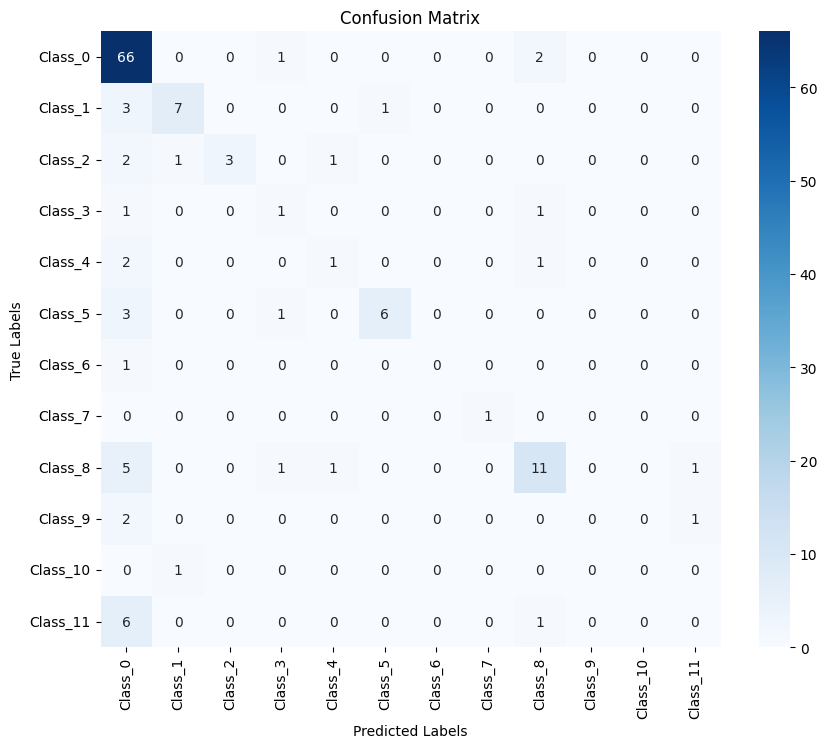

In [ ]:
## GA
class_names = [f"Class_{i}" for i in range(12)]
evaluate_classification(y_test, final_preds, class_names)

Accuracy: 71.32%

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.71      0.97      0.82        69
     Class_1       0.88      0.64      0.74        11
     Class_2       1.00      0.57      0.73         7
     Class_3       0.25      0.33      0.29         3
     Class_4       0.33      0.25      0.29         4
     Class_5       0.83      0.50      0.62        10
     Class_6       0.00      0.00      0.00         1
     Class_7       1.00      1.00      1.00         1
     Class_8       0.73      0.58      0.65        19
     Class_9       0.00      0.00      0.00         3
    Class_10       0.00      0.00      0.00         1
    Class_11       0.00      0.00      0.00         7

    accuracy                           0.71       136
   macro avg       0.48      0.40      0.43       136
weighted avg       0.67      0.71      0.67       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


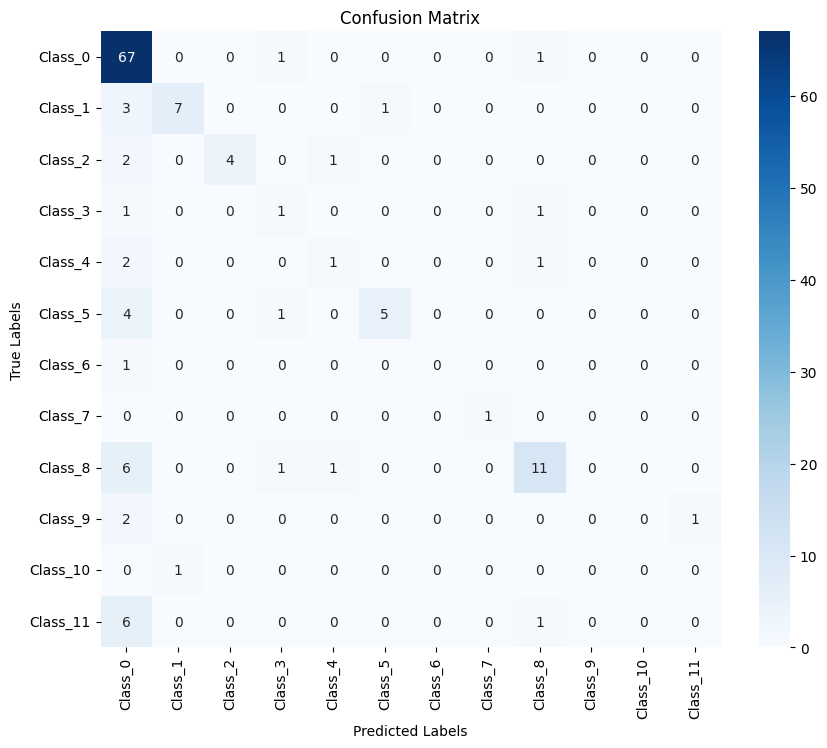

In [ ]:
## Grid search
class_names = [f"Class_{i}" for i in range(12)]
evaluate_classification(y_test, final_preds, class_names)

Accuracy: 72.06%

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.69      0.96      0.80        69
     Class_1       0.56      0.45      0.50        11
     Class_2       1.00      1.00      1.00         7
     Class_3       1.00      0.33      0.50         3
     Class_4       0.00      0.00      0.00         4
     Class_5       0.88      0.70      0.78        10
     Class_6       0.00      0.00      0.00         1
     Class_7       1.00      1.00      1.00         1
     Class_8       0.73      0.58      0.65        19
     Class_9       0.00      0.00      0.00         3
    Class_10       0.00      0.00      0.00         1
    Class_11       0.00      0.00      0.00         7

    accuracy                           0.72       136
   macro avg       0.49      0.42      0.44       136
weighted avg       0.65      0.72      0.67       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


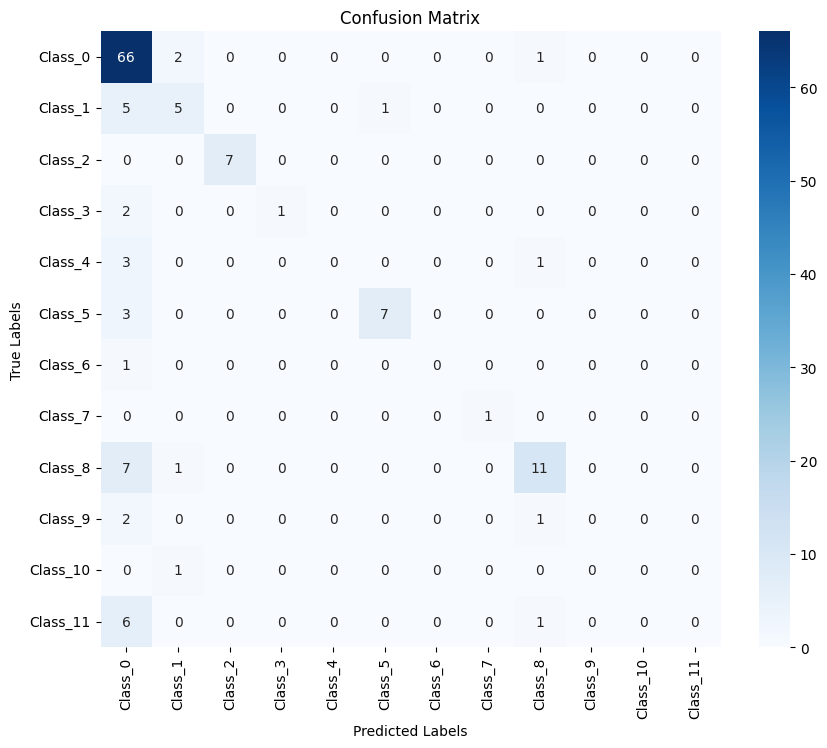

In [ ]:
# "GradientBoosting"
class_names = [f"Class_{i}" for i in range(12)]
evaluate_classification(y_test, evaluate[0], class_names)

In [ ]:

def evaluate_classification(y_true, y_pred, class_names):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")

    print(classification_report(y_true, y_pred, target_names=class_names))
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

Accuracy: 70.59%

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.74      0.94      0.83        69
     Class_1       0.80      0.73      0.76        11
     Class_2       1.00      0.43      0.60         7
     Class_3       0.25      0.33      0.29         3
     Class_4       0.50      0.50      0.50         4
     Class_5       0.86      0.60      0.71        10
     Class_6       0.00      0.00      0.00         1
     Class_7       0.00      0.00      0.00         1
     Class_8       0.69      0.58      0.63        19
     Class_9       0.00      0.00      0.00         3
    Class_10       0.00      0.00      0.00         1
    Class_11       0.00      0.00      0.00         7

    accuracy                           0.71       136
   macro avg       0.40      0.34      0.36       136
weighted avg       0.67      0.71      0.67       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


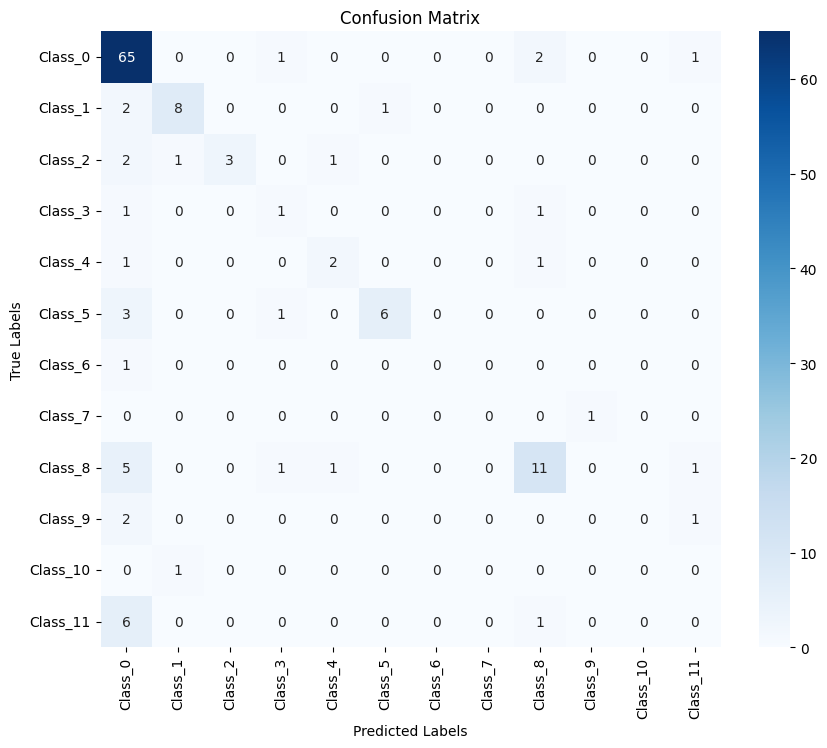

In [ ]:
# RandomForest
class_names = [f"Class_{i}" for i in range(12)]
evaluate_classification(y_test, evaluate[0], class_names)

Accuracy: 59.56%

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.69      0.99      0.81        69
     Class_1       0.20      0.45      0.28        11
     Class_2       1.00      0.14      0.25         7
     Class_3       0.00      0.00      0.00         3
     Class_4       0.00      0.00      0.00         4
     Class_5       0.00      0.00      0.00        10
     Class_6       0.00      0.00      0.00         1
     Class_7       0.00      0.00      0.00         1
     Class_8       0.78      0.37      0.50        19
     Class_9       0.00      0.00      0.00         3
    Class_10       0.00      0.00      0.00         1
    Class_11       0.00      0.00      0.00         7

    accuracy                           0.60       136
   macro avg       0.22      0.16      0.15       136
weighted avg       0.52      0.60      0.52       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


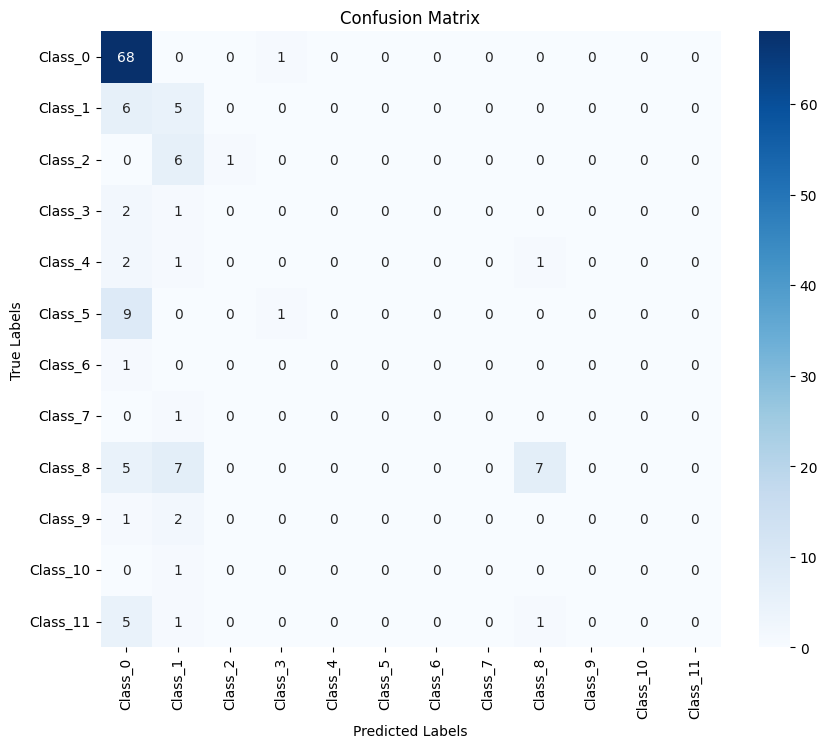

In [ ]:
# SVC
class_names = [f"Class_{i}" for i in range(12)]
evaluate_classification(y_test, evaluate[1], class_names)

Accuracy: 72.06%

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.71      0.96      0.81        69
     Class_1       0.67      0.73      0.70        11
     Class_2       1.00      0.71      0.83         7
     Class_3       0.33      0.33      0.33         3
     Class_4       0.50      0.50      0.50         4
     Class_5       1.00      0.40      0.57        10
     Class_6       0.00      0.00      0.00         1
     Class_7       1.00      1.00      1.00         1
     Class_8       0.85      0.58      0.69        19
     Class_9       0.00      0.00      0.00         3
    Class_10       0.00      0.00      0.00         1
    Class_11       0.00      0.00      0.00         7

    accuracy                           0.72       136
   macro avg       0.50      0.43      0.45       136
weighted avg       0.69      0.72      0.68       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


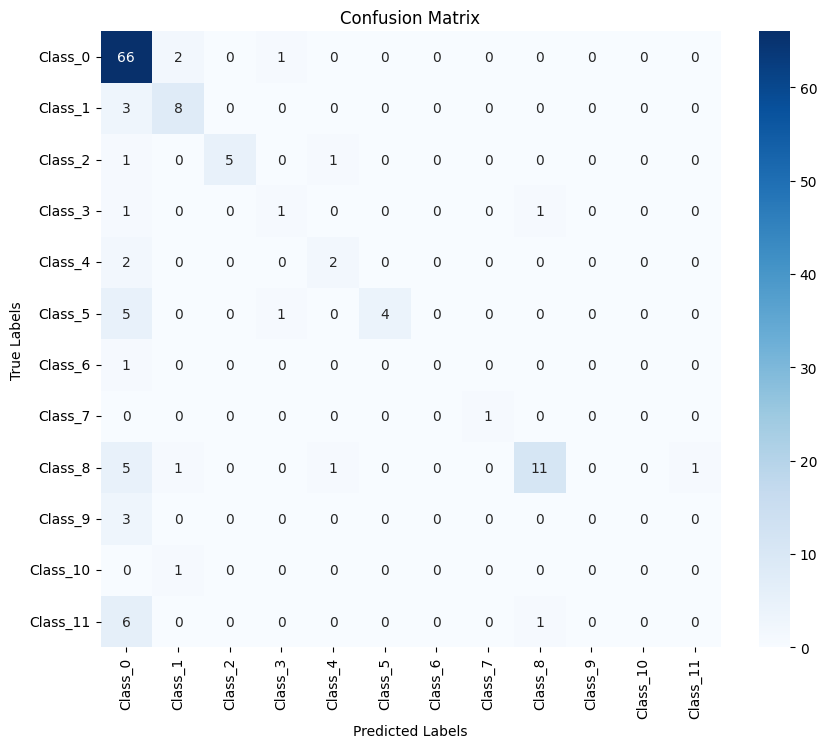

In [ ]:
# XGB
class_names = [f"Class_{i}" for i in range(12)]
evaluate_classification(y_test, evaluate[2], class_names)

Accuracy: 61.03%
Accuracy: 61.03%

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.72      0.93      0.81        69
     Class_1       0.44      0.36      0.40        11
     Class_2       1.00      0.43      0.60         7
     Class_3       0.33      0.33      0.33         3
     Class_4       0.00      0.00      0.00         4
     Class_5       0.40      0.20      0.27        10
     Class_6       0.00      0.00      0.00         0
     Class_7       0.00      0.00      0.00         1
     Class_8       0.50      1.00      0.67         1
     Class_9       0.78      0.37      0.50        19
    Class_10       0.00      0.00      0.00         3
    Class_11       0.00      0.00      0.00         1
    Class_12       0.08      0.14      0.11         7

    accuracy                           0.61       136
   macro avg       0.33      0.29      0.28       136
weighted avg       0.61      0.61      0.58       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

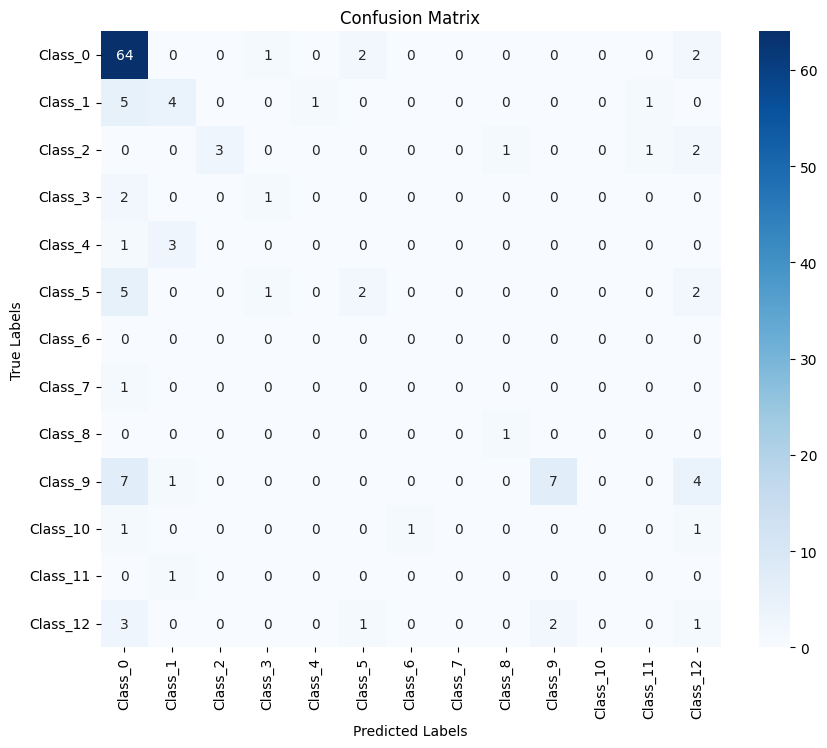

In [ ]:
## CNN
class_names = [f"Class_{i}" for i in range(13)]
predict_cnn = cnn_evaluate(cnn_model, test_loader)
evaluate_classification(y_test, predict_cnn)

Accuracy: 69.85%

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.69      0.97      0.81        69
     Class_1       0.88      0.64      0.74        11
     Class_2       1.00      0.57      0.73         7
     Class_3       0.25      0.33      0.29         3
     Class_4       0.00      0.00      0.00         4
     Class_5       0.80      0.40      0.53        10
     Class_6       0.00      0.00      0.00         1
     Class_7       1.00      1.00      1.00         1
     Class_8       0.73      0.58      0.65        19
     Class_9       0.00      0.00      0.00         3
    Class_10       0.00      0.00      0.00         1
    Class_11       0.00      0.00      0.00         7

    accuracy                           0.70       136
   macro avg       0.45      0.37      0.39       136
weighted avg       0.65      0.70      0.65       136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


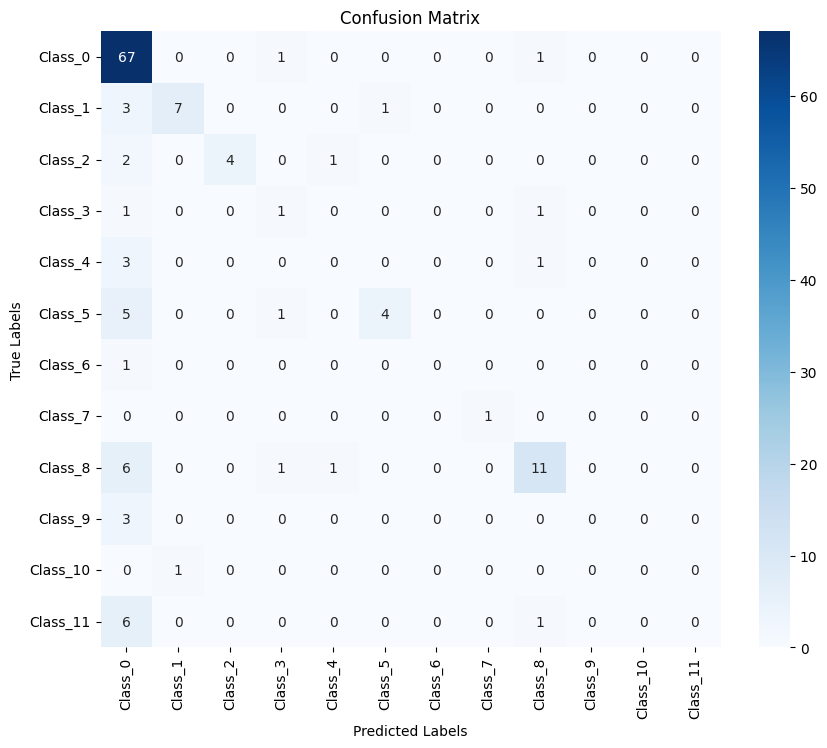

In [ ]:
#GA
class_names = [f"Class_{i}" for i in range(12)]
evaluate_classification(y_test, final_preds, class_names)